# Versuch 233 - Fourieroptik Auswertung
##### Felix Fleischle - 6.12.2021 und 13.12.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fmin

#%matplotlib qt5

## Eichung - Einzelspalt

In [2]:
pos_max_0 = 1064 #px position des ersten Maximums

min_es_x = pos_max_0 - np.array([976, 887,795, 712, 624]) #Pixel Abstand zum ersten Maximum
min_es_x_err = np.sqrt((np.ones(5)*3)**2 + (np.ones(5)*3)**2)
print("Abstände zum 0.Max:", min_es_x, "+-", min_es_x_err)

min_es_x_eich = np.array([0.23, 0.42, 0.64, 0.83, 1.06]) *10**(-3) #m
min_es_x_eich_err =np.ones(5)*0.02*10**(-3) #m

Abstände zum 0.Max: [ 88 177 269 352 440] +- [4.24264069 4.24264069 4.24264069 4.24264069 4.24264069]


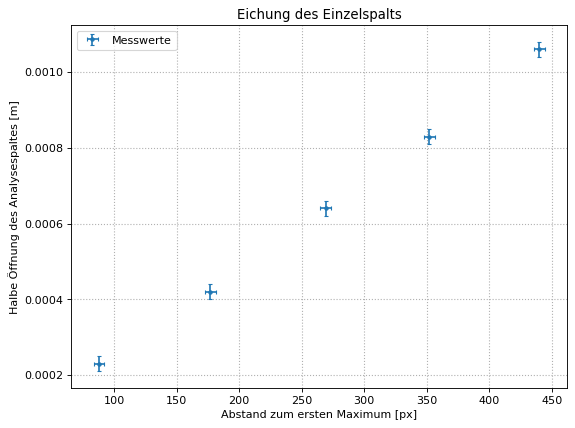

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Eichung des Einzelspalts')
plt.errorbar(min_es_x, min_es_x_eich, linestyle="None", marker = ".", xerr = min_es_x_err,yerr = min_es_x_eich_err, capsize = 2, label="Messwerte")
plt.legend()
plt.xlabel("Abstand zum ersten Maximum [px]")
plt.ylabel("Halbe Öffnung des Analysespaltes [m]")
plt.grid(linestyle=":", linewidth=1)

[2.39032214e-06]
Umrechnungsfaktor: x[m] = 2.3903221444285776e-06 +- 1.874240181710235e-08 x[px]


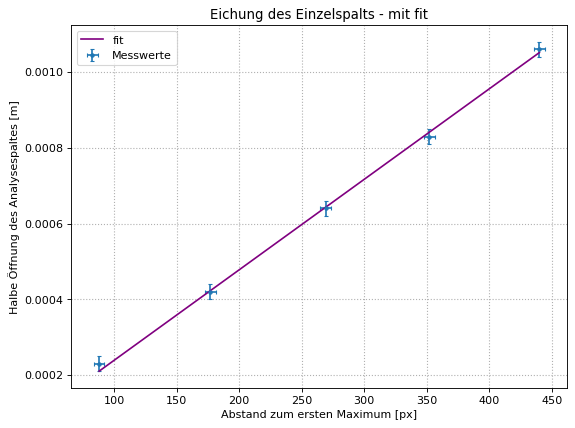

In [4]:
def truelinear(x,s):
    return x*s

popt_es_eich, pcov_es_eich = curve_fit(truelinear, min_es_x, min_es_x_eich, sigma=min_es_x_eich_err)
print(popt_es_eich)

pxtom_es = popt_es_eich[0]
pxtom_es_err = np.sqrt(pcov_es_eich[0,0])

print("Umrechnungsfaktor: x[m] =",pxtom_es, "+-", pxtom_es_err, "x[px]")

plt.figure(figsize=(8, 6), dpi=80)
plt.title('Eichung des Einzelspalts - mit fit')
plt.errorbar(min_es_x, min_es_x_eich, linestyle="None", marker = ".", xerr = min_es_x_err,yerr = min_es_x_eich_err, capsize = 2, label="Messwerte")
plt.plot(min_es_x, truelinear(min_es_x, pxtom_es),label="fit",color="purple")
plt.legend()
plt.xlabel("Abstand zum ersten Maximum [px]")
plt.ylabel("Halbe Öffnung des Analysespaltes [m]")
plt.grid(linestyle=":", linewidth=1)

## Quantitative Beobachtungen am Einfachspalt

In [5]:
min_es_x_m = min_es_x * pxtom_es
min_es_x_m_err = np.sqrt((min_es_x_err * pxtom_es)**2 + (min_es_x * pxtom_es_err)**2 )

print("Abstände zur Mitte in Metern:",min_es_x_m, "+-", min_es_x_m_err, "[m]")

min_es_o = np.array([1,2,3,4,5])

Abstände zur Mitte in Metern: [0.00021035 0.00042309 0.000643   0.00084139 0.00105174] +- [1.02745225e-05 1.06700842e-05 1.13253839e-05 1.20983562e-05
 1.30710699e-05] [m]


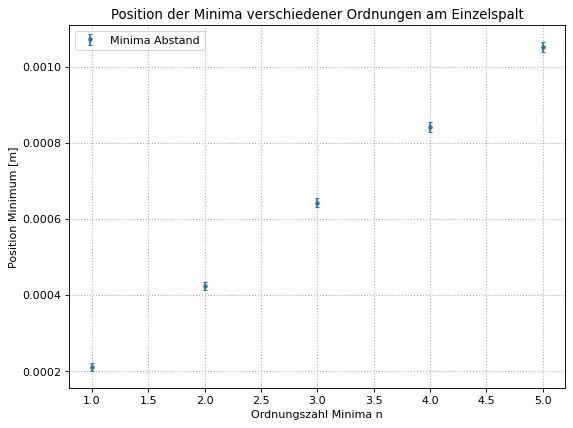

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Position der Minima verschiedener Ordnungen am Einzelspalt')
plt.errorbar(min_es_o, min_es_x_m, linestyle="None", marker = ".", yerr = min_es_x_m_err, capsize = 2, label="Minima Abstand")
plt.legend()
plt.xlabel("Ordnungszahl Minima n")
plt.ylabel("Position Minimum [m]")
plt.grid(linestyle=":", linewidth=1)

In [7]:
popt_min_es, pcov_min_es = curve_fit(truelinear, min_es_o, min_es_x_m, sigma=min_es_x_m_err)

s_min_es = popt_min_es[0]
s_min_es_err = np.sqrt(pcov_min_es[0,0])

print("Steigung:", s_min_es, "+-", s_min_es_err, "[m]")

Steigung: 0.00021121638279516188 +- 7.72741639470072e-07 [m]


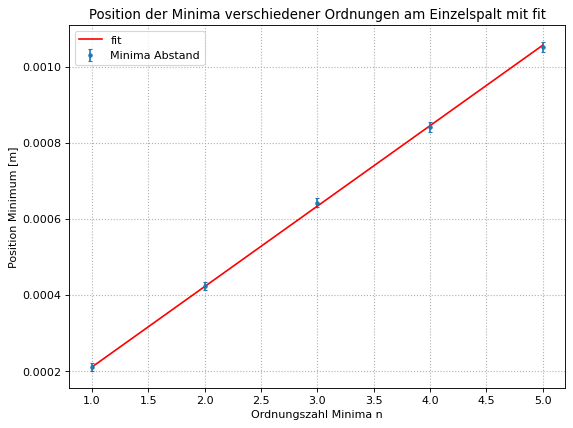

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Position der Minima verschiedener Ordnungen am Einzelspalt mit fit')
plt.errorbar(min_es_o, min_es_x_m, linestyle="None", marker = ".", yerr = min_es_x_m_err, capsize = 2, label="Minima Abstand")
plt.plot(min_es_o, truelinear(min_es_o, s_min_es),label="fit",color="red")
plt.legend()
plt.xlabel("Ordnungszahl Minima n")
plt.ylabel("Position Minimum [m]")
plt.grid(linestyle=":", linewidth=1)

In [9]:
# Spaltbreite aus Steigung, Herleitung in der Auswertung:
f_l1 = 80 * 10**(-3) #m Brennweite Linse L1
lmbda = 635 * 10**(-9) #m Wellenlänge Laser

breite_es = lmbda * f_l1 / s_min_es
breite_es_err = lmbda * f_l1 * s_min_es_err / (s_min_es)**2

print("Spaltbreite:", breite_es, "+-", breite_es_err, "[m]")

Spaltbreite: 0.00024051164652917078 +- 8.799192637951712e-07 [m]


In [10]:
# Positionen der Maxima des Einzelspalts
max_es_x = pos_max_0 - np.array([1064, 939.5, 842, 766, 667, 584])
max_es_x_err = np.sqrt((np.ones(6)*3)**2 + (np.ones(6)*3)**2)

max_es_x_m = max_es_x * pxtom_es
max_es_x_m_err = np.sqrt((max_es_x_err * pxtom_es)**2 + (max_es_x * pxtom_es_err)**2 )

max_es_o = max_es_x_m / s_min_es
max_es_o_err = np.sqrt((max_es_x_m_err / s_min_es)**2 + (max_es_x_m * s_min_es_err / (s_min_es)**2)**2)

print("Maxima Positionen relativ in px:", max_es_x, "+-", max_es_x_err, "[px]")
print("Maxima Positionen in Metern:", max_es_x_m, "+-", max_es_x_m_err, "[m]")
print("Ordnungszahlen aus Gerade:", max_es_o, "+-", max_es_o_err)

max_es_o_theo = np.array([0, 1.430297 , 2.459024, 3.470890, 4.477409, 5.481537]) #Bestimmt aus GeoGebra

sigma_max_es_o = np.abs((max_es_o_theo - max_es_o)/max_es_o_err)

print("Abweichungen der Positionen:", sigma_max_es_o)

Maxima Positionen relativ in px: [  0.  124.5 222.  298.  397.  480. ] +- [4.24264069 4.24264069 4.24264069 4.24264069 4.24264069 4.24264069] [px]
Maxima Positionen in Metern: [0.         0.0002976  0.00053065 0.00071232 0.00094896 0.00114735] +- [1.01412780e-05 1.04062678e-05 1.09616552e-05 1.15775808e-05
 1.25781570e-05 1.35565440e-05] [m]
Ordnungszahlen aus Gerade: [0.         1.40895845 2.51235964 3.37244673 4.49282333 5.43212896] +- [0.04801369 0.0495372  0.05270542 0.0561853  0.06177788 0.06718961]
Abweichungen der Positionen: [0.         0.4307581  1.0119575  1.75211788 0.24951204 0.7353524 ]


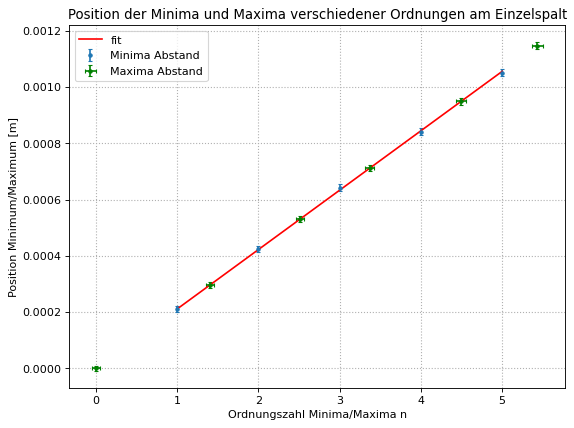

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Position der Minima und Maxima verschiedener Ordnungen am Einzelspalt')
plt.errorbar(min_es_o, min_es_x_m, linestyle="None", marker = ".", yerr = min_es_x_m_err, capsize = 2, label="Minima Abstand")
plt.errorbar(max_es_o, max_es_x_m, linestyle="None", marker = ".",color="Green", yerr = max_es_x_m_err, xerr = max_es_o_err, capsize = 2, label="Maxima Abstand")
plt.plot(min_es_o, truelinear(min_es_o, s_min_es),label="fit",color="red")
plt.legend()
plt.xlabel("Ordnungszahl Minima/Maxima n")
plt.ylabel("Position Minimum/Maximum [m]")
plt.grid(linestyle=":", linewidth=1)

In [12]:
# Intensitäten:

int_u = 0.002
int_u_err = 0.001

int_es_last = np.array([0.255, 0.118, 0.070, 0.045]) - int_u
int_es_last_err = np.sqrt((np.ones(4)*0.002)**2 + int_u_err**2)
int_es_first = np.array([0.637, 0.038]) - int_u
int_es_first_err = np.sqrt((np.ones(2)*0.002)**2 + (int_u_err)**2) 

print("Intensitäten mit Untergrund abgezogen: Keine Sättigung:", int_es_first, "+-", int_es_first_err, "Sättigung:", int_es_last, "+-", int_es_last_err)
norm_fkt_es = 1 / int_es_first[0]
norm_fkt_es_err = int_es_first_err[0] / (int_es_first[0])**2

print("Normierungsfaktor:", norm_fkt_es, "+-", norm_fkt_es_err)

int_es_max1_saett = 0.568 - int_u
int_es_max1_saett_err = np.sqrt(0.002**2 + int_u_err**2)

saett_fkt_es = int_es_first[1] / int_es_max1_saett
saett_fkt_es_err = np.sqrt((int_es_first_err[1] / int_es_first[1])**2 + (int_es_max1_saett_err / int_es_max1_saett)**2) * saett_fkt_es

print("Sättigungsfaktor:", saett_fkt_es, "+-", saett_fkt_es_err)

int_es_first_corr = norm_fkt_es * int_es_first
int_es_first_corr_err = np.sqrt((norm_fkt_es_err * int_es_first)**2 + (norm_fkt_es*int_es_first_err)**2)

int_es_last_corr = norm_fkt_es * saett_fkt_es * int_es_last
int_es_last_corr_err = np.sqrt((norm_fkt_es_err * saett_fkt_es * int_es_last)**2 + (norm_fkt_es * saett_fkt_es_err * int_es_last)**2 + (norm_fkt_es * saett_fkt_es * int_es_last_err)**2)

int_es = np.concatenate((int_es_first_corr, int_es_last_corr))
int_es_err = np.concatenate((int_es_first_corr_err, int_es_last_corr_err))

print("Intensitäten normiert, auf Sättigung angepasst:", int_es, "+-", int_es_err)

Intensitäten mit Untergrund abgezogen: Keine Sättigung: [0.635 0.036] +- [0.00223607 0.00223607] Sättigung: [0.253 0.116 0.068 0.043] +- [0.00223607 0.00223607 0.00223607 0.00223607]
Normierungsfaktor: 1.574803149606299 +- 0.005545459675118828
Sättigungsfaktor: 0.06360424028268552 +- 0.003958633247501072
Intensitäten normiert, auf Sättigung angepasst: [1.         0.05669291 0.02534153 0.01161904 0.00681116 0.00430706] +- [0.00497996 0.00352702 0.00159554 0.00075815 0.00048005 0.00034965]


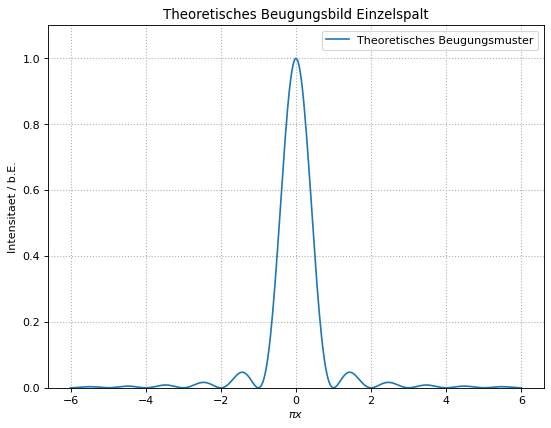

In [13]:
def beugung_spalt(x):
    return np.sinc(x)**2

nr_max = 5
x_values_int_es = np.linspace(-(nr_max+1),nr_max+1,400)
int_es_peakind = beugung_spalt(x_values_int_es)
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Theoretisches Beugungsbild Einzelspalt')
plt.plot(x_values_int_es,int_es_peakind,label="Theoretisches Beugungsmuster")
#plt.errorbar(int_es_o, int_es, linestyle="None", marker = ".",color="Green", yerr = int_es_err, capsize = 2, label="Gemessene Intensität")
plt.xlabel("$\pi x$")
plt.ylabel("Intensitaet / b.E.")
plt.ylim((0,1.1))
plt.grid(linestyle=":", linewidth=1)
plt.legend()

In [14]:
#Wir bestimmen die theoretischen Intensitäten mit der matplotlib qt5 Cursor-Funktion.

int_es_theo = np.array([1, 0.04721, 0.01638, 0.00833, 0.00503, 0.003363])
int_es_theo_err = np.array([0, 0.00020, 0.00020, 0.00020, 0.00020, 0.00020])

sigma_int_es_theo = (int_es - int_es_theo)/(np.sqrt(int_es_err**2 + int_es_theo_err**2))

print("Abweichungen der Intensitäten:", sigma_int_es_theo)

Abweichungen der Intensitäten: [-2.22937925e-14  2.68433421e+00  5.57300148e+00  4.19476008e+00
  3.42502884e+00  2.34370260e+00]


## Beugungsstruktur des Doppelspaltes

In [15]:
#Spaltabstand und Spaltbreite aus Protokoll 2:

abstand_ds = (1455 + 1295)/2 - (1102 + 932)/2
abstand_ds_err = np.sqrt(1.5**2 + 1.5**2 + 1.5**2 + 1.5**2)

breite_ds_1 = (1102 - 932)
breite_ds_2 = (1455 - 1295)
breite_ds = np.mean(np.array([breite_ds_1, breite_ds_2]))
breite_ds_err = np.sqrt((np.std(np.array([breite_ds_1, breite_ds_2])))**2 + (np.sqrt(3**2 + 3**2))**2)

print("Spaltabstand:", abstand_ds, "+-", abstand_ds_err, "[px]")
print("Spaltbreite:", breite_ds, "+-", breite_ds_err, "[px]")

def beugung_doppelspalt(x):
    return np.sinc(x)**2 * np.cos(np.pi*v*x)**2

a = 1
v = abstand_ds / breite_ds
x = np.linspace(-(a+1),a+1,400)

Spaltabstand: 358.0 +- 3.0 [px]
Spaltbreite: 165.0 +- 6.557438524302 [px]


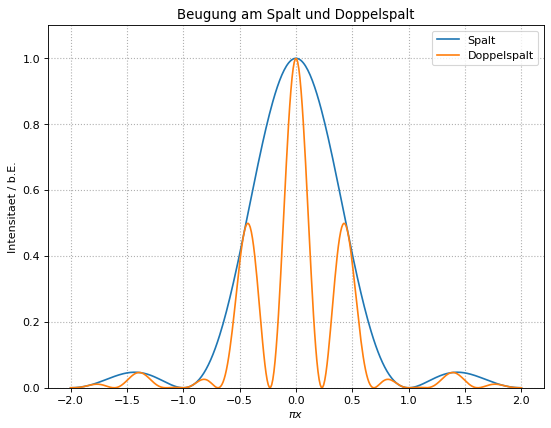

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Theoretische Beugungsbilder Einzelspalt und Doppelspalt')
plt.plot(x,beugung_spalt(x),label="Spalt")
plt.plot(x,beugung_doppelspalt(x),label="Doppelspalt")
plt.xlabel("$\pi x$")
plt.ylabel("Intensitaet / b.E.")
plt.title("Beugung am Spalt und Doppelspalt")
plt.ylim((0,1.1))
plt.grid(linestyle=":", linewidth=1)
plt.legend()

In [17]:
# Wir bestimmen die theoretischen Intensitäten der Maxima bis zum ersten Minimum des Einzelspaltes mit der Cursor-Funktion:

int_ds_theo = np.array([1, 0.500, 0.0258])
int_ds_theo_err = np.array([0, 0.00020, 0.00020])

In [18]:
# Unsere Messwerte, wieder minus Untergrund und Normiert, auf Sättigung angepasst

int_ds_last = np.array([0.104, 0.048, 0.050]) - int_u
int_ds_last_err = np.sqrt((np.ones(3)*0.002)**2 + int_u_err**2)
int_ds_first = np.array([0.573, 0.348]) - int_u
int_ds_first_err = np.sqrt((np.array([0.005, 0.003]))**2 + (int_u_err)**2) 

print("Intensitäten mit Untergrund abgezogen: Keine Sättigung:", int_ds_first, "+-", int_ds_first_err, "Sättigung:", int_ds_last, "+-", int_ds_last_err)
norm_fkt_ds = 1 / int_ds_first[0]
norm_fkt_ds_err = int_ds_first_err[0] / (int_ds_first[0])**2

print("Normierungsfaktor Doppelspalt:", norm_fkt_ds, "+-", norm_fkt_ds_err, "[1/cnt]")

int_ds_max1_saett = 0.763 - int_u
int_ds_max1_saett_err = np.sqrt(0.010**2 + int_u_err**2)

saett_fkt_ds = int_ds_first[1] / int_ds_max1_saett
saett_fkt_ds_err = np.sqrt((int_ds_first_err[1] / int_ds_first[1])**2 + (int_ds_max1_saett_err / int_ds_max1_saett)**2) * saett_fkt_ds

print("Sättigungsfaktor Doppelspalt:", saett_fkt_ds, "+-", saett_fkt_ds_err)

int_ds_first_corr = norm_fkt_ds * int_ds_first
int_ds_first_corr_err = np.sqrt((norm_fkt_ds_err * int_ds_first)**2 + (norm_fkt_ds*int_ds_first_err)**2)

int_ds_last_corr = norm_fkt_ds * saett_fkt_ds * int_ds_last
int_ds_last_corr_err = np.sqrt((norm_fkt_ds_err * saett_fkt_ds * int_ds_last)**2 + (norm_fkt_ds * saett_fkt_ds_err * int_ds_last)**2 + (norm_fkt_ds * saett_fkt_ds * int_ds_last_err)**2)

int_ds = np.concatenate((int_ds_first_corr, int_ds_last_corr))
int_ds_err = np.concatenate((int_ds_first_corr_err, int_ds_last_corr_err))

print("Intensitäten normiert, auf Sättigung angepasst:", int_ds, "+-", int_ds_err)

Intensitäten mit Untergrund abgezogen: Keine Sättigung: [0.571 0.346] +- [0.00509902 0.00316228] Sättigung: [0.102 0.046 0.048] +- [0.00223607 0.00223607 0.00223607]
Normierungsfaktor Doppelspalt: 1.7513134851138354 +- 0.015639197259218276 [1/cnt]
Sättigungsfaktor Doppelspalt: 0.45466491458607095 +- 0.007302055323628828
Intensitäten normiert, auf Sättigung angepasst: [1.         0.60595447 0.0812186  0.036628   0.03822052] +- [0.0126289  0.00774285 0.00232328 0.00190347 0.00191401]


In [19]:
# Abweichungen der Maxima 0.,1.,2. Ordnung:
int_ds_relevant = int_ds[0:3]
int_ds_relevant_err = int_ds_err[0:3]
sigma_int_ds_theo = (int_ds_relevant - int_ds_theo)/(np.sqrt(int_ds_relevant_err**2 + int_ds_theo_err**2))

print("Abweichungen der Intensitäten:", sigma_int_ds_theo)

Abweichungen der Intensitäten: [ 0.         13.67961279 23.76569575]


In [20]:
# Positionen Doppelspalt
pos_max_0_ds = 933 #px position des ersten Maximums

min_ds_x = pos_max_0_ds - np.array([914,835, 799, 743]) #Pixel Abstand zum ersten Maximum
min_ds_x_err = np.sqrt((np.ones(4)*3)**2 + (np.ones(4)*3)**2)
print("Abstände zum 0.Max:", min_ds_x, "+-", min_ds_x_err)

min_ds_x_eich = np.array([0.04, 0.16, 0.22, 0.30]) *10**(-3) #m
min_ds_x_eich_err =np.ones(4)*0.02*10**(-3) #m

Abstände zum 0.Max: [ 19  98 134 190] +- [4.24264069 4.24264069 4.24264069 4.24264069]


## Fourierbild des Einzelspaltes

In [23]:
# Berechung der Spaltbreite
f_l1 = 0.08 #m
bw = 0.768 #m
bw_err = 0.004 #m

breite_esf = ( 938 - 775 ) * 14 * 10**(-6)
breite_esf_err = np.sqrt(3**2 + 3**2)* 14 * 10**(-6)

#Gegenstandsweite gw:
gw = 1/((1/f_l1)-(1/bw))
gw_err = np.sqrt((1/((1/f_l1)-(1/bw))**2 * (1/bw**2) * bw_err)**2)

print("Gegenstandsweite:", gw, "+-", gw_err, "[m]")

#Abbildungsmaßstab:
abbm = bw / gw
abbm_err = np.sqrt((bw_err / bw)**2 + (gw_err / gw)**2) * abbm

print("Abbildungsmaßstab:", abbm, "+-", abbm_err, "[m]")

breite_esf_real = breite_esf / abbm
breite_esf_real_err = np.sqrt((breite_esf_err / abbm)**2 + ((abbm_err * breite_esf) /(abbm)**2)**2)

print("Spaltbreite:", breite_esf_real, "+-", breite_esf_real_err, "[m]")

# Abweichung zum ersten Wert:
sigma_breite_es = np.abs((breite_es - breite_esf_real)/(np.sqrt(breite_es_err**2 + breite_esf_real_err**2)))
print("Abweichung Spaltbreite:", sigma_breite_es)

Gegenstandsweite: 0.08930232558139535 +- 5.408328826392645e-05 [m]
Abbildungsmaßstab: 8.6 +- 0.04509346004565283 [m]
Spaltbreite: 0.0002653488372093023 +- 7.04537284813091e-06 [m]
Abweichung Spaltbreite: 3.4981425597383393


In [24]:
#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)
d = breite_es #Spaltbreite auf 1 setzen
n = 50 #Integrationsbereich

#y-Werte:
Y=np.linspace(-1,1,200)*d

In [25]:
#Berechnung des resultierenden Objektbilds
from scipy.integrate import quad
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)

#Kurve auf 1 normieren:
f_modifiziert=f_modifiziert/np.max(f_modifiziert)

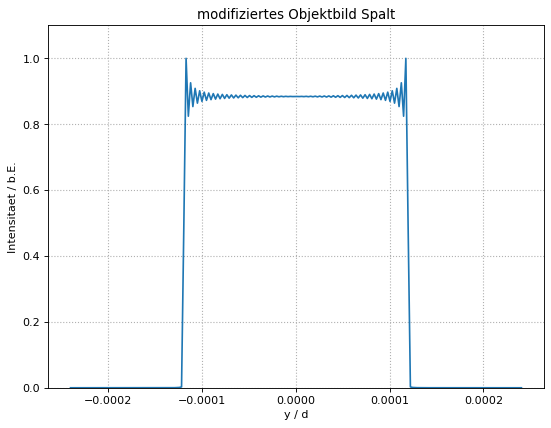

In [26]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(Y,f_modifiziert)
plt.xlabel("y / d")
plt.ylabel("Intensitaet / b.E.")
plt.title("modifiziertes Objektbild Spalt")
plt.ylim((0,1.1))
plt.grid(linestyle=":", linewidth=1)
#plt.savefig("figures/spalt.pdf", format="pdf")

In [27]:
# Wir bestimmen mit der Cursor-Funktion die Intensitäten der Minima und Maxima, und die Lage der Maxima

# n=1
int_esf_o0_theo = np.array([1])
int_esf_o0_theo_err = np.array([0])

pos_esf_o0_theo = np.array([0])
pos_esf_o0_theo_err = np.array([0])

# n=2
int_esf_o1_theo = np.array([0.6474, 1])
int_esf_o1_theo_err = np.array([0.0003, 0.0003])

pos_esf_o1_theo = np.array([5.956*10**(-5)])
pos_esf_o1_theo_err = np.array([0.1*10**(-5)])

# n=3
int_esf_o2_theo = np.array([0.9323, 0.6972 , 1])
int_esf_o2_theo_err = np.array([0.0003, 0.0003, 0.0003])

pos_esf_o2_theo = np.array([0, 8.022*10**(-5)])
pos_esf_o2_theo_err = np.ones(2)*0.1*10**(-5)

# n=4

int_esf_o3_theo = np.array([0.7413, 0.9104 , 0.7178, 1])
int_esf_o3_theo_err = np.array([0.0003, 0.0003, 0.0003, 0.0003])

pos_esf_o3_theo = np.array([3.019*10**(-5), 9.055*10**(-5)])
pos_esf_o3_theo_err = np.ones(2)*0.1*10**(-5)

In [28]:
# Rechne Abstände um in Einheiten des Messprogramms
pxtom_esf_theo = (20 / 30.19) / (1*10**(-6))

pos_esf_o0_theo_m = pxtom_esf_theo * pos_esf_o0_theo
pos_esf_o0_theo_m_err = pxtom_esf_theo * pos_esf_o0_theo_err
print("Theoretische Abstände in Metern 0.Ordnung:", pos_esf_o0_theo_m, "+-", pos_esf_o0_theo_m_err)

pos_esf_o1_theo_m = pxtom_esf_theo * pos_esf_o1_theo
pos_esf_o1_theo_m_err = pxtom_esf_theo * pos_esf_o1_theo_err
print("Theoretische Abstände in Metern 1.Ordnung:", pos_esf_o1_theo_m, "+-", pos_esf_o1_theo_m_err)

pos_esf_o2_theo_m = pxtom_esf_theo * pos_esf_o2_theo
pos_esf_o2_theo_m_err = pxtom_esf_theo * pos_esf_o2_theo_err
print("Theoretische Abstände in Metern 2.Ordnung:", pos_esf_o2_theo_m, "+-", pos_esf_o2_theo_m_err)

pos_esf_o3_theo_m = pxtom_esf_theo * pos_esf_o3_theo
pos_esf_o3_theo_m_err = pxtom_esf_theo * pos_esf_o3_theo_err
print("Theoretische Abstände in Metern 3.Ordnung:", pos_esf_o3_theo_m, "+-", pos_esf_o3_theo_m_err)

Theoretische Abstände in Metern 0.Ordnung: [0.] +- [0.]
Theoretische Abstände in Metern 1.Ordnung: [39.45677377] +- [0.66247102]
Theoretische Abstände in Metern 2.Ordnung: [ 0.         53.14342498] +- [0.66247102 0.66247102]
Theoretische Abstände in Metern 3.Ordnung: [20.         59.98675058] +- [0.66247102 0.66247102]


In [29]:
# Messdaten Intensitäten der Minima und Maxima, Normierung

int_esf_u = 0.002
int_esf_u_err = 0.001

int_esf_o0 = np.array([0.648]) - int_esf_u
int_esf_o0_err = np.sqrt(np.array([0.002])**2 + (int_esf_u_err)**2 )

print("Intensitäten ohne Untergrund Ordnung 0:", int_esf_o0, "+-", int_esf_o0_err)

int_esf_o1 = np.array([0.445, 0.610]) - int_esf_u
int_esf_o1_err = np.sqrt( np.array([0.002 , 0.002])**2 + int_esf_u_err**2)

print("Intensitäten ohne Untergrund Ordnung 1:", int_esf_o1, "+-", int_esf_o1_err)

int_esf_o2 = np.array([0.593, 0.445, 0.596]) - int_esf_u
int_esf_o2_err = np.sqrt( (np.ones(3)*0.002)**2 + int_esf_u_err**2 )

print("Intensitäten ohne Untergrund Ordnung 2:", int_esf_o2, "+-", int_esf_o2_err)

int_esf_o3 = np.array([0.495, 0.563, 0.439, 0.594]) - int_esf_u
int_esf_o3_err = np.sqrt( (np.ones(4)*0.002)**2 + int_esf_u_err**2 )

print("Intensitäten ohne Untergrund Ordnung 3:", int_esf_o3, "+-", int_esf_o3_err)

norm_fkt_esf = 1 / int_esf_o0[0]
norm_fkt_esf_err = int_esf_o0_err[0] / (int_esf_o0[0])**2
print("Normierungsfaktor Fourier Einzelspalt:", norm_fkt_esf, "+-", norm_fkt_esf_err)

# Normierung:

int_esf_o0_corr = norm_fkt_esf * int_esf_o0
int_esf_o0_corr_err = np.sqrt((norm_fkt_esf * int_esf_o0_err)**2 + (norm_fkt_esf_err * int_esf_o0)**2 )
print("Normierte Intensitäten Ordnung 0:", int_esf_o0_corr, "+-", int_esf_o0_corr_err)

int_esf_o1_corr = norm_fkt_esf * int_esf_o1
int_esf_o1_corr_err = np.sqrt((norm_fkt_esf * int_esf_o1_err)**2 + (norm_fkt_esf_err * int_esf_o1)**2 )
print("Normierte Intensitäten Ordnung 1:", int_esf_o1_corr, "+-", int_esf_o1_corr_err)

int_esf_o2_corr = norm_fkt_esf * int_esf_o2
int_esf_o2_corr_err = np.sqrt((norm_fkt_esf * int_esf_o2_err)**2 + (norm_fkt_esf_err * int_esf_o2)**2 )
print("Normierte Intensitäten Ordnung 2:", int_esf_o2_corr, "+-", int_esf_o2_corr_err)

int_esf_o3_corr = norm_fkt_esf * int_esf_o3
int_esf_o3_corr_err = np.sqrt((norm_fkt_esf * int_esf_o3_err)**2 + (norm_fkt_esf_err * int_esf_o3)**2 )
print("Normierte Intensitäten Ordnung 3:", int_esf_o3_corr, "+-", int_esf_o3_corr_err)

Intensitäten ohne Untergrund Ordnung 0: [0.646] +- [0.00223607]
Intensitäten ohne Untergrund Ordnung 1: [0.443 0.608] +- [0.00223607 0.00223607]
Intensitäten ohne Untergrund Ordnung 2: [0.591 0.443 0.594] +- [0.00223607 0.00223607 0.00223607]
Intensitäten ohne Untergrund Ordnung 3: [0.493 0.561 0.437 0.592] +- [0.00223607 0.00223607 0.00223607 0.00223607]
Normierungsfaktor Fourier Einzelspalt: 1.547987616099071 +- 0.005358212907005218
Normierte Intensitäten Ordnung 0: [1.] +- [0.00489517]
Normierte Intensitäten Ordnung 1: [0.68575851 0.94117647] +- [0.00419711 0.00475337]
Normierte Intensitäten Ordnung 2: [0.91486068 0.68575851 0.91950464] +- [0.00469141 0.00419711 0.00470228]
Normierte Intensitäten Ordnung 3: [0.76315789 0.86842105 0.67647059 0.91640867] +- [0.00435424 0.00458444 0.00417901 0.00469503]


In [30]:
# Messwerte Positionen der Maxima, Umrechnung in Abstand zum 0. Max bei 0. Ordnung

pos_esf_o0 = np.array([859]) #px
pos_esf_o0_err = np.array([3]) #px

pos_esf_o1 = np.array([819])
pos_esf_o1_err = np.array([3])

pos_esf_o2 = np.array([857, 805])
pos_esf_o2_err = np.ones(2)*3

pos_esf_o3 = np.array([839, 799])
pos_esf_o3_err = np.ones(2)*3

# Relativ zum 0. Max bei Betrachtung 0.Ordnung:

pos_esf_o0_rel = pos_esf_o0 - pos_esf_o0
pos_esf_o0_rel_err = np.sqrt(pos_esf_o0_err**2 + pos_esf_o0_err**2)
print("Position Maxima 0.Ordnung relativ:", pos_esf_o0_rel, "+-", pos_esf_o0_rel_err)

pos_esf_o1_rel = pos_esf_o0 - pos_esf_o1
pos_esf_o1_rel_err = np.sqrt(pos_esf_o0_err**2 + pos_esf_o1_err**2)
print("Position Maxima 1.Ordnung relativ:", pos_esf_o1_rel, "+-", pos_esf_o1_rel_err)

pos_esf_o2_rel = pos_esf_o0 - pos_esf_o2
pos_esf_o2_rel_err = np.sqrt(pos_esf_o0_err**2 + pos_esf_o2_err**2)
print("Position Maxima 1.Ordnung relativ:", pos_esf_o2_rel, "+-", pos_esf_o2_rel_err)

pos_esf_o3_rel = pos_esf_o0 - pos_esf_o3
pos_esf_o3_rel_err = np.sqrt(pos_esf_o0_err**2 + pos_esf_o3_err**2)
print("Position Maxima 1.Ordnung relativ:", pos_esf_o3_rel, "+-", pos_esf_o3_rel_err)

Position Maxima 0.Ordnung relativ: [0] +- [4.24264069]
Position Maxima 1.Ordnung relativ: [40] +- [4.24264069]
Position Maxima 1.Ordnung relativ: [ 2 54] +- [4.24264069 4.24264069]
Position Maxima 1.Ordnung relativ: [20 60] +- [4.24264069 4.24264069]


In [31]:
# Berechnung der Abweichungen - Intensitäten
sigma_int_esf_o0 = np.abs((int_esf_o0_theo - int_esf_o0_corr)/np.sqrt(int_esf_o0_theo_err**2 + int_esf_o0_corr_err**2))
print("Abweichungen Intensitäten 0. Ordnung:", sigma_int_esf_o0)

sigma_int_esf_o1 = np.abs((int_esf_o1_theo - int_esf_o1_corr)/np.sqrt(int_esf_o1_theo_err**2 + int_esf_o1_corr_err**2))
print("Abweichungen Intensitäten 1. Ordnung:", sigma_int_esf_o1)

sigma_int_esf_o2 = np.abs((int_esf_o2_theo - int_esf_o2_corr)/np.sqrt(int_esf_o2_theo_err**2 + int_esf_o2_corr_err**2))
print("Abweichungen Intensitäten 2. Ordnung:", sigma_int_esf_o2)

sigma_int_esf_o3 = np.abs((int_esf_o3_theo - int_esf_o3_corr)/np.sqrt(int_esf_o3_theo_err**2 + int_esf_o3_corr_err**2))
print("Abweichungen Intensitäten 3. Ordnung:", sigma_int_esf_o3)

Abweichungen Intensitäten 0. Ordnung: [0.]
Abweichungen Intensitäten 1. Ordnung: [ 9.11601271 12.35054233]
Abweichungen Intensitäten 2. Ordnung: [ 3.70970908  2.71910253 17.08364648]
Abweichungen Intensitäten 3. Ordnung: [ 5.00804224  9.13728505  9.86437394 17.76798172]


In [32]:
# Berechnung der Abweichungen - Position
sigma_pos_esf_o0 = np.abs((pos_esf_o0_theo_m - pos_esf_o0_rel)/np.sqrt(pos_esf_o0_theo_m_err**2 + pos_esf_o0_rel_err**2))
print("Abweichungen Positionen 0. Ordnung:", sigma_pos_esf_o0)

sigma_pos_esf_o1 = np.abs((pos_esf_o1_theo_m - pos_esf_o1_rel)/np.sqrt(pos_esf_o1_theo_m_err**2 + pos_esf_o1_rel_err**2))
print("Abweichungen Positionen 1. Ordnung:", sigma_pos_esf_o1)

sigma_pos_esf_o2 = np.abs((pos_esf_o2_theo_m - pos_esf_o2_rel)/np.sqrt(pos_esf_o2_theo_m_err**2 + pos_esf_o2_rel_err**2))
print("Abweichungen Positionen 2. Ordnung:", sigma_pos_esf_o2)

sigma_pos_esf_o3 = np.abs((pos_esf_o3_theo_m - pos_esf_o3_rel)/np.sqrt(pos_esf_o3_theo_m_err**2 + pos_esf_o3_rel_err**2))
print("Abweichungen Positionen 3. Ordnung:", sigma_pos_esf_o3)

Abweichungen Positionen 0. Ordnung: [0.]
Abweichungen Positionen 1. Ordnung: [0.12650672]
Abweichungen Positionen 2. Ordnung: [0.46576073 0.1994795 ]
Abweichungen Positionen 3. Ordnung: [8.27357260e-16 3.08552985e-03]


## Fourierbild des Doppelspalts

In [33]:
# Breite und Spaltabstand des Doppelspalts
breite_ds_k = breite_ds * 14 * 10**(-6)
breite_ds_k_err = breite_ds_err * 14 * 10**(-6)

abstand_ds_k = abstand_ds * 14 * 10**(-6)
abstand_ds_k_err = abstand_ds_err * 14 * 10**(-6)

breite_ds_k_real = breite_ds_k / abbm
breite_ds_k_real_err = np.sqrt((breite_ds_k_err / abbm)**2 + (breite_ds_k * abbm_err / (abbm)**2)**2)
print("Berechnete Spaltbreite in Metern:", breite_ds_k_real, "+-", breite_ds_k_real_err)

abstand_ds_k_real = abstand_ds_k / abbm
abstand_ds_k_real_err = np.sqrt((abstand_ds_k_err / abbm)**2 + (abstand_ds_k * abbm_err / (abbm)**2)**2)
print("Berechneter Spaltabstand in Metern:", abstand_ds_k_real, "+-", abstand_ds_k_real_err)

Berechnete Spaltbreite in Metern: 0.0002686046511627907 +- 1.076740929270809e-05
Abweichung Spaltbreite: 0.21289154938431845
Berechneter Spaltabstand in Metern: 0.0005827906976744186 +- 5.760969006482166e-06
Abweichung Spaltabstand: 0.21289154938431845


In [34]:
d_ds = breite_ds_k_real

def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d_ds/2)/(k*d_ds/2)*np.cos(y*k)

g = v * d_ds
print(g)
print(v)

#Startwert für raten von n (Fall b):
n_guess = d_ds / g
print("Startwert n:",n_guess)

k_guess = 2*np.pi / abstand_ds_k_real 
k_guess_test = 2*np.pi*n_guess / breite_ds_k_real
print("Startwert k:", k_guess, k_guess_test)
#Spaltabstand in Einheiten der Spaltbreite:

n = 0.3095



Y_ds=np.linspace(-2,2,400)*d_ds

0.0005827906976744187
2.16969696969697
Startwert n: 0.4608938547486033
Startwert k: 10781.203839134965 10781.203839134962


In [35]:
#Berechnung des resultierenden Objektbilds
from scipy.integrate import quad
f_modifiziert_ds=[]
for i in range(len(Y_ds)):
    y=Y_ds[i]
    result, error = quad(doppelspalt, 0, 2*np.pi*n/d_ds)
    f_modifiziert_ds.append(result**2)

#Kurve auf 1 normieren:
f_modifiziert_ds=f_modifiziert_ds/np.max(f_modifiziert_ds)

Text(-0.00024, 0.2, 'n=0.3095')

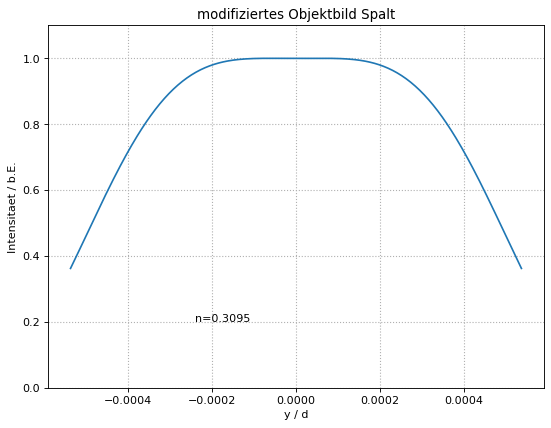

In [36]:
ordstr = "n={}".format(n)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(Y_ds,f_modifiziert_ds)
plt.xlabel("y / d")
plt.ylabel("Intensitaet / b.E.")
plt.title("modifiziertes Objektbild Spalt")
plt.ylim((0,1.1))
plt.grid(linestyle=":", linewidth=1)
plt.text(-0.00024, 0.2, ordstr)
#plt.savefig("figures/spalt.pdf", format="pdf")

In [37]:
n_bestimmt = 0.3095
n_bestimmt_err = 0.0003


k_y_bestimmt = 2*np.pi*n_bestimmt / breite_ds_k_real
k_y_bestimmt_err = np.sqrt((2*np.pi*n_bestimmt_err / breite_ds_k_real)**2 + (2*np.pi*n_bestimmt*breite_ds_k_real_err / (breite_ds_k_real)**2)**2)
print("Durch Iteration bestimmte Integrationsgrenze:", k_y_bestimmt, "+-", k_y_bestimmt_err, "[1/m]")

b_analysier = 0.210 * 10**(-3)  #m 
b_analysier_err = 0.005 * 10**(-3)  #m

k_y_exp = np.pi * b_analysier * 2 / (f_l1 * lmbda)
k_y_exp_err = np.pi * b_analysier_err * 2 / (f_l1 * lmbda)
print("Experimentelle Integrationsgrenze:",k_y_exp,"+-",k_y_exp_err, "[1/m]")

sigma_k_y = (k_y_exp - k_y_bestimmt)/(np.sqrt(k_y_exp_err**2 + k_y_bestimmt_err**2))
print("Abweichung:", sigma_k_y)

Durch Iteration bestimmte Integrationsgrenze: 7239.807070181777 +- 290.3030595976557 [1/m]
Experimentelle Integrationsgrenze: 25973.79752967939 +- 618.4237507066522 [1/m]
Abweichung: 27.422075358333554
